<a href="https://colab.research.google.com/github/anirb1nag/neural-networks-and-deep-learning/blob/master/Histology_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.callbacks import *

In [0]:
bs = 32

In [3]:
!wget https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1

--2020-03-12 10:51:34--  https://zenodo.org/record/53169/files/Kather_texture_2016_image_tiles_5000.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258098431 (246M) [application/octet-stream]
Saving to: ‘Kather_texture_2016_image_tiles_5000.zip?download=1’

Kather_texture_2016 100%[===================>] 246.14M  7.85MB/s    in 29s     

2020-03-12 10:52:05 (8.41 MB/s) - ‘Kather_texture_2016_image_tiles_5000.zip?download=1’ saved [258098431/258098431]



In [4]:
!mv 'Kather_texture_2016_image_tiles_5000.zip?download=1' 'Kather.zip'
!unzip 'Kather.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10286_CRC-Prim-HE-01_002.tif_Row_301_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1030D_CRC-Prim-HE-02_031.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/103B7_CRC-Prim-HE-02_026.tif_Row_1_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/103F_CRC-Prim-HE-02_025.tif_Row_1_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/103F_CRC-Prim-HE-10_013.tif_Row_151_Col_1.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/10437_CRC-Prim-HE-02_028.tif_Row_151_Col_451.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/104D5_CRC-Prim-HE-09_024.tif_Row_451_Col_151.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/1055E_CRC-Prim-HE-01_027.tif_Row_151_Col_301.tif  
  inflating: Kather_texture_2016_image_tiles_5000/01_TUMOR/105C1_CRC-Prim-HE-07_0

In [5]:
import os
os.listdir()

['.config',
 'Kather.zip',
 'Kather_texture_2016_image_tiles_5000',
 'sample_data']

In [6]:
path = Path('./Kather_texture_2016_image_tiles_5000/') 
path.ls()

[PosixPath('Kather_texture_2016_image_tiles_5000/03_COMPLEX'),
 PosixPath('Kather_texture_2016_image_tiles_5000/08_EMPTY'),
 PosixPath('Kather_texture_2016_image_tiles_5000/01_TUMOR'),
 PosixPath('Kather_texture_2016_image_tiles_5000/05_DEBRIS'),
 PosixPath('Kather_texture_2016_image_tiles_5000/02_STROMA'),
 PosixPath('Kather_texture_2016_image_tiles_5000/04_LYMPHO'),
 PosixPath('Kather_texture_2016_image_tiles_5000/06_MUCOSA'),
 PosixPath('Kather_texture_2016_image_tiles_5000/07_ADIPOSE')]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

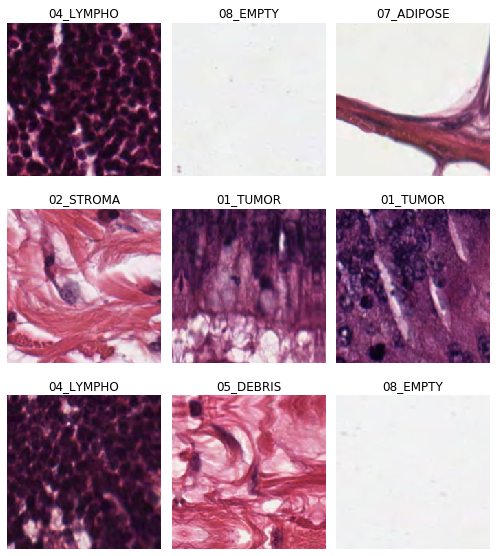

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)
data.show_batch(rows=3, figsize=(7,8))

In [9]:
learn = cnn_learner(data, models.squeezenet1_0, metrics=[error_rate,accuracy,Precision(),Recall()])

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/checkpoints/squeezenet1_0-a815701f.pth


In [10]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,time
0,0.806489,0.304690,0.100000,0.900000,0.902812,0.903079,00:23
1,0.494798,0.261862,0.095000,0.905000,0.907042,0.907772,00:23


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 6.31E-08


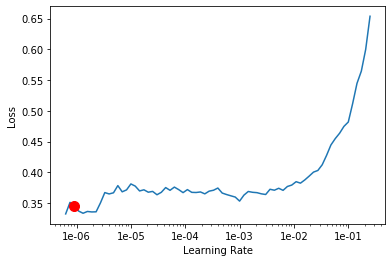

In [11]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(10, max_lr=slice(1E-06,1E-05),callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best')])

epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,time
0,0.377603,0.261259,0.097000,0.903000,0.903790,0.905908,00:24
1,0.369362,0.252058,0.090000,0.910000,0.912641,0.912171,00:24
2,0.353855,0.246247,0.085000,0.915000,0.917324,0.917338,00:24
3,0.350526,0.242546,0.085000,0.915000,0.917060,0.917480,00:24
4,0.343951,0.238947,0.080000,0.920000,0.922568,0.921757,00:24
5,0.350447,0.233901,0.084000,0.916000,0.919776,0.917314,00:24
6,0.327290,0.231629,0.081000,0.919000,0.922184,0.920520,00:24
7,0.327455,0.231703,0.085000,0.915000,0.917286,0.916793,00:24
8,0.325602,0.232059,0.083000,0.917000,0.919656,0.918852,00:24
9,0.334157,0.230605,0.080000,0.920000,0.922833,0.921712,00:24


Better model found at epoch 0 with accuracy value: 0.902999997138977.
Better model found at epoch 1 with accuracy value: 0.9100000262260437.
Better model found at epoch 2 with accuracy value: 0.9150000214576721.
Better model found at epoch 4 with accuracy value: 0.9200000166893005.


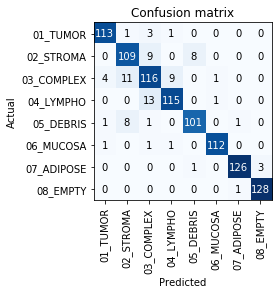

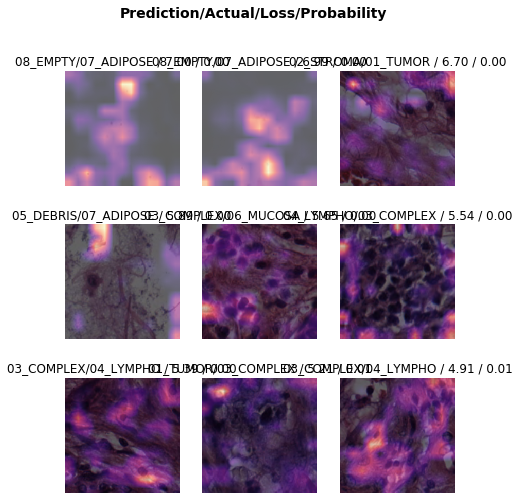

In [15]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix() 
interp.plot_top_losses(9,heatmap=True, figsize=(7,8))